### Yêu cầu: đọc dữ liệu về, chuẩn hóa dữ liệu (nếu cần) và áp dụng thuật toán SVM để thực hiện việc dự đoán Class (1 hay 0) dựa trên thông tin được cung cấp
1. Đọc dữ liệu. Tiền xử lý dữ liệu nếu cần. Trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.2
3. Áp dụng thuật toán SVM
4. Tìm kết quả
5. Kiểm tra độ chính xác
6. X_new = [[3.2, -2.1, 1.7, 0.1], [-2.9297, -5.0816, 9.0958, -1.0]], hãy cho biết y_new

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
bankdata = pd.read_csv("../../Data/bill_authentication.csv")

In [3]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


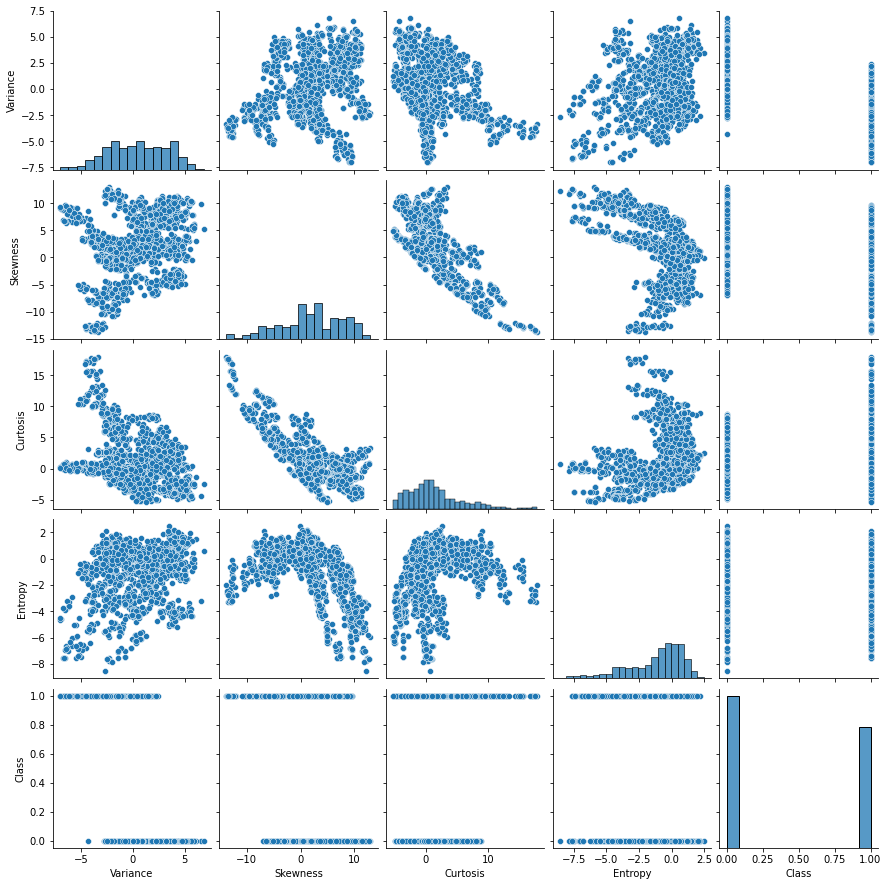

In [4]:
sns.pairplot(bankdata)

In [5]:
# Class: có giá trị là 0 và 1
X = bankdata[["Variance", "Skewness","Curtosis","Entropy"]]
y = bankdata["Class"]

In [6]:
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = clf.predict(X_test)

In [11]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy is  98.18181818181819 %


In [12]:
# Kiểm tra độ chính xác
print("The Train/ Score is: ",
clf.score(X_train,y_train)*100,"%")
print("The Test/ Score accuracy is: ",
clf.score(X_test,y_test)*100,"%")

The Train/ Score is:  99.08842297174111 %
The Test/ Score accuracy is:  98.18181818181819 %


In [13]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[152   3]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       155
           1       0.98      0.98      0.98       120

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [14]:
X_new = [[3.2, -2.1, 1.7, 0.1], [-2.9297, -5.0816, 9.0958, -1.0]]

In [15]:
y_new = clf.predict(X_new)
y_new

array([0, 1], dtype=int64)